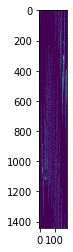

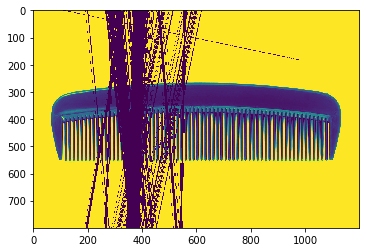

In [36]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt


def hough(img, d_teta):
    G_x = cv2.Sobel(img, cv2.CV_64F, 1,0, ksize=5)
    G_y = cv2.Sobel(img, cv2.CV_64F, 0,1, ksize=5)
    gradients_dir = (180 / np.pi) * (np.arctan2(G_y, G_x))
    gradients_dir [gradients_dir <0] += 180
    
    th_max = (gradients_dir + d_teta).astype('uint32')
    th_max[th_max>180]=180
    th_min = (gradients_dir- d_teta).astype('uint32')
    th_min[th_min<0]=0
    
    row,col = img.shape
    rhos = int(np.sqrt(np.square(row)+np.square(col)))
    H = np.zeros(( rhos, 180))
    for i in range(row):
        for j in range(col):
            if img[i,j]:
                teta_lst = [t for t in range(th_min[i, j], th_max[i, j])]
                for t in teta_lst:
                    P= round((i * np.cos(t)) + (j * np.sin(t)))
                    H[int(P), t]+=1
    M=H.copy()
    rho_teta=[]
    r,t = np.where(M>30)
    for j in range(len(r)):
        rho_teta.append((r[j], t[j]))
    

    for (rho,tetaa) in rho_teta:
        x1 = int(np.cos(tetaa)*rho + 1000*(-(np.sin(tetaa))))
        y1 = int(np.sin(tetaa)*rho + 1000*(np.cos(tetaa)))
        x2 = int(np.cos(tetaa)*rho - 1000*(-(np.sin(tetaa))))
        y2 = int(np.sin(tetaa)*rho - 1000*(np.cos(tetaa)))
        cv2.line(img_comb,(x1,y1),(x2,y2),(0,0,255),1)

    return H


img_comb = cv2.imread('comb.jpg', 0)
img_canyy = cv2.Canny(img_comb, 50, 150, apertureSize=3)
hough_transform = hough(img_canyy , 30)


cv2.imwrite('hough.jpg', img_comb)
plt.imshow(hough_transform)
plt.show()
plt.imshow(img_comb)
plt.show()